
# Project: No Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the 'Medical Appointment No Shows' dataset in Kaggle. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It is interesting for me to understand the patient behavior and characteristics and finding trends among patients showing up/not for their scheduled appointment.<br>
<br>Some of the questions that can be explored are as follows:
<br>The primary question would be to ascertain whether certain features directly influence a patient's likelihood to miss or show up for their appointment.
<br>Does age affect on people for showing up for their appointments? And which age segment is caring less/more about health?
<br>Which gender of each age segment is caring less/more about health? Which gender is commited more to their appointment, Male or Female?
<br>What is the percentage of the people who show up for their appointments out of the total number?
<br>On which weekday/day/month maximum appointments are getting finalized with Show status?
<br>Is there any specific medical condition that is driving the patient(Male/Female) to go to for the doctor appointment?
<br>Are the digital /social media reminders are helping the patients to take doctor's appointment?
<br>Is Scholarship from the government helping patients for good turnaround for physician visits?



In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Loading dataset

In [279]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.\
df = pd.read_csv('M:/Udacity/noshowappointments.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<br>There are 14 features in this dataset. The explanation for each feature is as follows:
<br>PatientId: Identification of a patient
<br>AppointmentID: Identification of each appointment
<br>Gender: Male or Female
<br>ScheduledDay: What day the patient set up their appointment
<br>AppointmentDay: The day of the actual appointment, when they have to visit the doctor
<br>Age: How old is the patient
<br>Neighbourhood: Indicates the location of the hospital
<br>Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (Yes(1) or No(0))
<br>Hypertension: Yes(1) or No(0)
<br>Diabetes: Yes(1) or No(0)
<br>Alcoholism: Yes(1) or No(0)
<br>Handcap: Yes(1) or No(0)
<br>SMS_received: Yes(1) or No(0)
<br>No-show: ‘No’if the patient showed up to their appointment, and ‘Yes’ if they didn't show up

In [280]:
#The dimensions of the dataset
df.shape

(110527, 14)

In [281]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [282]:
#5 point summary of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Let us visualize these features for better understanding.

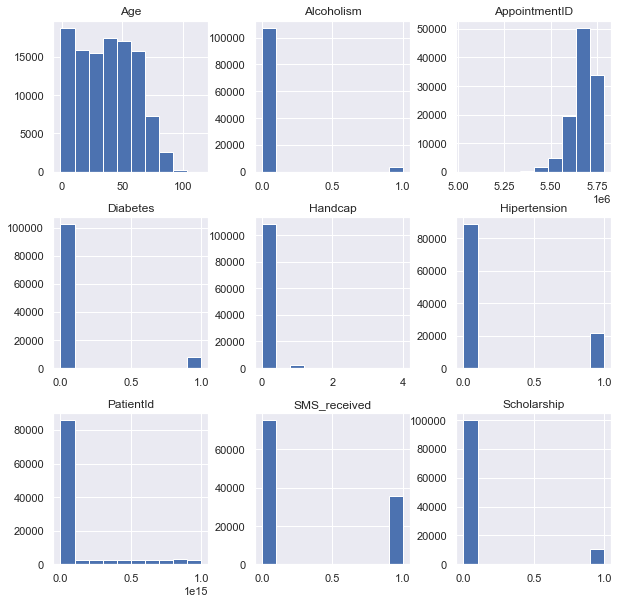

In [283]:
#Histograms of all the features for a quick introduction
df.hist(figsize=(10,10));

### Initial Observations
><br>The dataset contains over 110k observations and 14 features.
<br>The naming of the columns is inconsistent and needs to be modified.
<br>The "No-show" feature is the dependent variable, having 'Yes' and 'No' entries (where 'Yes' implies the patient did not show up for the appointment while 'No' indicates that they did show up.
<br>It is observed that the minimum age is a negative value of -1 which does not make sense and needs to be looked into.
<br>Each row contains a Patient ID and an Appointment ID, but it isn't obvious whether the dataset accounts for multiple appointment bookings for the same patient.
<br>The data types for ScheduledDay and AppointmentDay are not convenient. They should be changed to datetime.
<br>The data types of certain variables (Gender, Scholarship,Hypertension,Diabetes, Alcoholism, Handicap, SMS_received and No show) needs to be changed to categorical to make things easier.
<br>It can be seen that the Handicap has values other than 0 and 1 and that doesn't make sence so we will have to drop these.
<br>Also most of the patients are below 60 years old,don't suffer from alcoholism/diabetes/hypertension, are not handicapped,
didn't receive a reminder sms and didnt receive the scholarship.

### Data Cleaning 
><br>Now, there are several data cleaning tasks that needs to be done before analyzing the data.

In [232]:
#Checking missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the dataset

In [233]:
#checking duplicate entries
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [284]:
#checking unique values for PatientId and AppointmentId
df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

So, it can be observed that there are as many unique Appointment IDs as total rows but less Patient IDs than the records.This confirms that atleast Patient IDs are repeated.
<br>There seemed to be a few outliers in Age field as observed before which could potentially be errors.Let's visualize them.


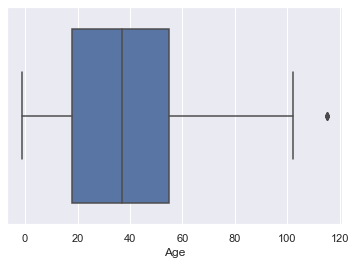

In [285]:
#box plot for detecting outliers in Age variable
sns.boxplot(df.Age)
plt.show()

The youngest patient is -1 and the oldest is 115. It can be observed in the boxplot that there are outliers at the higher end of the range but the values below zero could not be identified. 

In [286]:
#checking for any incorrect entries of age 
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one entry with a negative value for Age and is probably a data entry error and hence this row can be dropped.



In [287]:
# finding patients with Age=0
len(df.query('Age == 0'))


3539

As we have 3539 patients with Age equal to 0 we are assuming that these are few months old babies. As babies usually don't have Hypertension or Diabetes or Alcoholism we will check these features for the above records to see if our assumption is correct.

In [289]:
#checking if patients with Age=0 have any disease for confirming them to be babies 
df[(df.Age == 0) & ((df.Hipertension == 1) | (df.Diabetes == 1) | (df.Alcoholism == 1))]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


As we have no records above, we will confirm that Age of 0 indeed represents babies who are just few months old.

In [290]:
#checking for any older patients with incorrect age entries
df.query('Age > 100')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


The above results show that there are 2 patients who are 115 years old which is really interesting. It is definitely possible for someone to live that long and celebrate life but these are extremely rare cases so we will consider them to be outliers and remove from further analysis. 

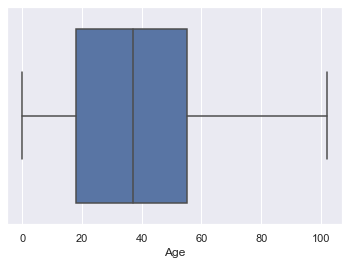

In [291]:
# Triming the outliers
df = df[(df.Age > -1) & (df.Age < 115)]

#boxplot to verify the results
sns.boxplot(df.Age)
plt.show()

Now as observed above there are no outliers in the boxplot. 
<br>We will also drop Patient ID and Appointment ID from the dataset as we won't inlcude them in further analysis.

In [292]:
#dropping patientid and appointmentid from the dataset
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

Let us categorize Age into 4 age groups as below for further analyzing this feature better.

In [293]:
#categorizing age variable into 4 bins
df["Age_bins"] = pd.cut(df.Age, 4, labels = ["0 - 18", "19 - 37", "38 - 55", "56 - 105"],include_lowest=True)

So, we have 4 Age groups now in the categories- 0 to 18, 19 to 37, 38 to 55 and 56 to 105.

In [294]:
#checking for data dimensions with above modifications
df.shape

(110521, 13)

In [295]:
#Checking first 2 rows of data after the column manipulations 
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_bins
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,38 - 55
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,38 - 55


Now, let us correct all the typos in the column names and rename them to make them consistent across the dataset.

In [296]:
#renaming all the columns to lowercase for maintaining consistency
labels = ['gender', 'scheduled_day', 'appointment_day','age',
          'neighbourhood', 'scholarship', 'hypertension','diabetes', 'alcoholism',
          'handicap', 'sms_received', 'no_show','age_bins']
df.columns = labels
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,38 - 55
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,38 - 55


The columns have been renamed now as seen above and the columns- PatientID and AppointmentID are dropped.
<br>We will now change the data type for the scheduled_day and appointment_day to datetime which will make it easier to manipulate the dates and perform operations on them.

In [297]:
#chaning datatype for scheduled day and appointment day 
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

We will now extract the day of week from Appointment Day for further analysis.

In [298]:
#function for extracting the weekday_name 
day_from_datetime = lambda dt: dt.day_name()

# Applying the function to the AppointmentDay column
df['dayofweek'] = df.appointment_day.apply(day_from_datetime)

#Counting Day wise appointments 
df.dayofweek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22712
Friday,19018
Thursday,17245
Saturday,39


It can be seen that Wednesday and Tuesday were the most common days for appointments, followed by Monday Friday and Thursday. Saturday was the least common with only 39 appointments.<br>We will also change the data type for the categorical features.

In [299]:
#changing datatypes for categorical features
df['gender'] = df['gender'].astype('category')
df['scholarship'] = df['scholarship'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['scholarship'] = df['scholarship'].astype('category')
df['alcoholism'] = df['alcoholism'].astype('category')
df['handicap'] = df['handicap'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['no_show']= df['no_show'].astype('category')

In [300]:
#checking data summary again after manipulating datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110521 non-null  category           
 1   scheduled_day    110521 non-null  datetime64[ns, UTC]
 2   appointment_day  110521 non-null  datetime64[ns, UTC]
 3   age              110521 non-null  int64              
 4   neighbourhood    110521 non-null  object             
 5   scholarship      110521 non-null  category           
 6   hypertension     110521 non-null  category           
 7   diabetes         110521 non-null  category           
 8   alcoholism       110521 non-null  category           
 9   handicap         110521 non-null  category           
 10  sms_received     110521 non-null  category           
 11  no_show          110521 non-null  category           
 12  age_bins         110521 non-null  category           
 13 

In [301]:
#checking first 2 rows of the dataset after data cleaning 
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins,dayofweek
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,38 - 55,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,38 - 55,Friday


<a id='eda'></a>
## Exploratory Data Analysis

> Now, we can observe that the dataset is all cleaned and we can now proceed to exploration part.


Let us define a function now which we will use throughout the analysis for visualizing data.

In [302]:
# Defininhg funtion for plotting percent wise graphs for 2 groups
def draw_percent_plot(feature1,chartTitle,x_ticks_labels):
    x,y = feature1, 'no_show'
    g= (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=5, aspect=8/7))

    g.ax.set_title(chartTitle)
    g.ax.set_xticklabels(x_ticks_labels)
     
    
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

Now, let us look at our dependent variable no_show to get some intuition about our data.

In [303]:
#counting patients who showed up / not for appointments
df['no_show'].value_counts()


No     88205
Yes    22316
Name: no_show, dtype: int64

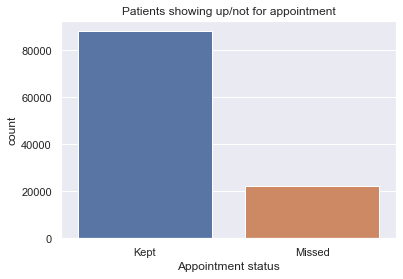

In [304]:
#plotting bar charts for Patients showing up/not for appointment
ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Patients showing up/not for appointment")
x_ticks_labels=['Kept', 'Missed']
ax.set_xticklabels(x_ticks_labels)
ax.set_xlabel('Appointment status')
plt.show()

We can see that out of 110,521 patients making appointments, 88,205 of them have turned up and that's around 80% and 22,316 didnot show up for the appointment which is around 20%.
<br>Now, let us explore some of the questions mentioned before one by one to get know more characteristics about these patients who show up/not for their appointments.

### Research Question 1: Does age affect on people for showing up for their appointments? 

Let us look at the overall distribution of patient ages, then we will look at the age trend by Show and No Show.

Mean age: 37.09


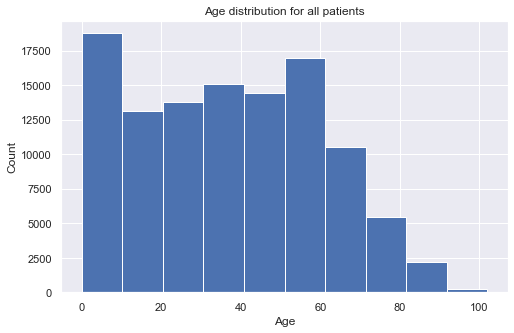

In [305]:
#Plotting histogram for checking age distribution
df.age.hist(label='Age',figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for all patients');
print('Mean age: {:.2f}'.format(df.age.mean()))

The age of the entire dataset has a bimodal distribution, with peaks around 0 and 60 years old and a mean of 37 years.

In [306]:
#calculating mean age of all the patients
df.groupby('no_show').mean()

,age
no_show,
No,37.788753
Yes,34.306820


It is observed that there is not a major difference in the mean ages of patients who kept appointments( around 38 years) and those who missed (34 years).

In [307]:
#counting age-bin wise number of patients 
df.age_bins.value_counts()

0 - 18      38599
19 - 37     38071
38 - 55     29035
56 - 105     4816
Name: age_bins, dtype: int64

Now let's visualize this as well.

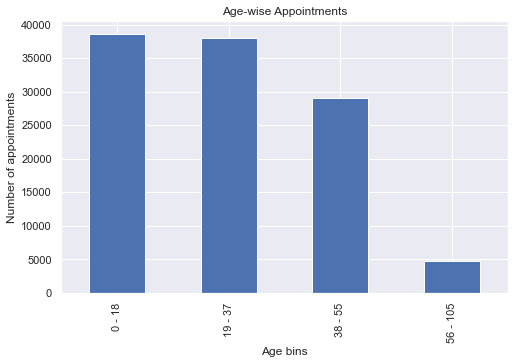

In [308]:
#plotting the bar chart for Age-wise Appointments
df.age_bins.value_counts(sort=False).plot(kind='bar',figsize=(8,5))
plt.title('Age-wise Appointments');
plt.xlabel('Age bins');
plt.ylabel('Number of appointments');

Here we observe that there are maximum patients from the age category 0 to 18 (young), followed by 19 to 37 (adults). Also, the age category 56 to 105 (senior patients) has the least count. 

Now, let us explore the Age of the patients with the show/no-show for the appointments. 

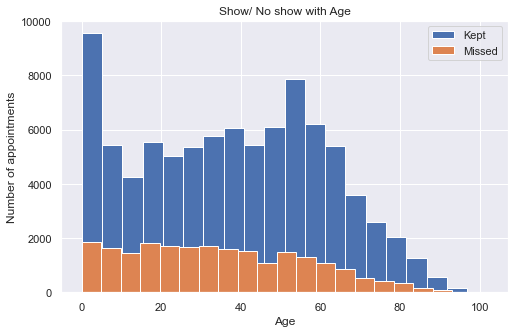

In [311]:
#plotting the bar chart for no of appointments with show/ no show
df.groupby('no_show')['age'].hist(bins=20,figsize=(8,5))
plt.ylabel('Number of appointments')
plt.xlabel('Age')
plt.title('Show/ No show with Age')
labels= ['Kept','Missed']
plt.legend(labels);


On the surface, we can see that young children (patients between 0 and 5 years) have the highest number of appointments. Also, the trend tends to decline for the very old patients, but then we have seen that count of patients for these age categories is also less compared to the young patients. The trends are quite similar (for show and no show), both showing a decline in number of appointments for the much older patients.
<br>
<br>Let us visualize Age with categories defined earlier now for understanding the trends clearly.

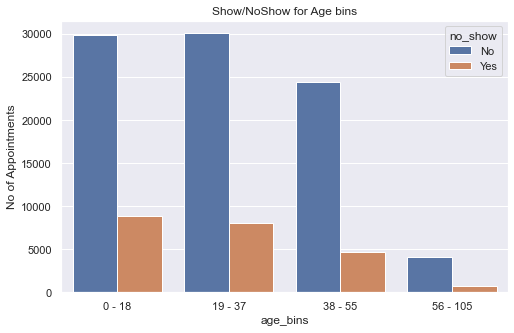

In [312]:
##plotting the bar chart for show/ no Appointments after categorizing age
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df.age_bins, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Age bins")
x_ticks_labels=["0 - 18","19 - 37","38 - 55","56 - 105"]
ax.set_xticklabels(x_ticks_labels)
ax.set(ylabel = 'No of Appointments')   
plt.show();

As seen above, for the patients who showed up for their appointments (no_show = No), those with ages within the range: 19 to 37 and 0 to 18 have the highest number of appointments.
<br>For those who didn't show up (no_show = Yes), the same categories mentioned above age group seems to also have the highest numbers as well. 
<br>The senior patients (56 to 105) are the ones who are least likely to miss their appointments.
<br>
<br> Now, let's visualize these numbers in terms of proportions so that we can compare them on the same level and validate our findings above.

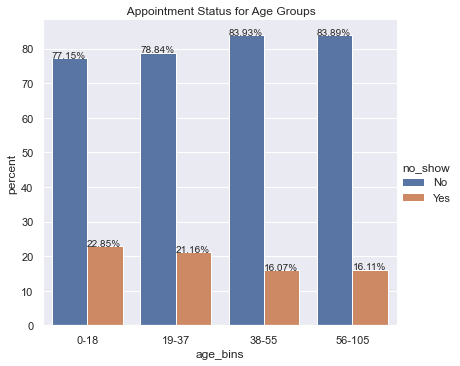

In [313]:
#plotting percent bar chart for Appointment Status for Age Groups by using the function defined earlier
draw_percent_plot('age_bins'," Appointment Status for Age Groups",['0-18', '19-37','38-55','56-105'])

Now we can clearly observe all the above age categories showing up/ not for the appointments in terms of percentages.
<br> It is interesting to observe now that it is the senior and old patients (age category 38 to 55 and age category 56 to 105) who have the highest percentage - around 84% of showing up for an appointment.
<br> Similarly patients in the age category (0 to 18) have the most tendency to miss their appointment.
<br> Here, we can say that as age increases, the likelihood of missing appointments decreases and there are less no shows.

### Research Question 2  Which gender is commited more to their appointment, Male or Female?

In [314]:
#counting the no of patients gender wise
df_gender =df['gender'].value_counts()
df_gender

F    71834
M    38687
Name: gender, dtype: int64

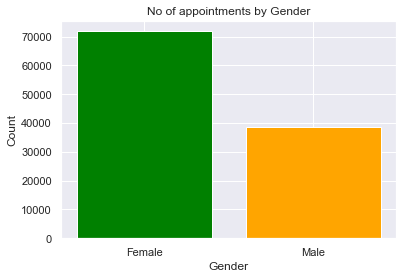

In [315]:
#plotting bar charts for no of appointments wih Gender
locations = [1, 2]
heights = df_gender
labels = ["Female", "Male"]
chartXlabel = 'Gender'
plt.bar(locations, heights, tick_label=labels,color= ['green','orange'])
plt.title('No of appointments by Gender')
plt.xlabel(chartXlabel)
plt.ylabel('Count');

Among the total appointments, 71,834 are females and 38687 are males. So, it is clear that there are more females making appointments than males. Let's calculate the percentages for simplicity.

In [316]:
#Calculating percentage of males and females among the total patients
df.groupby('gender').gender.count()*100/df.gender.count()

gender
F    64.995793
M    35.004207
Name: gender, dtype: float64

So,looking at the total appointments 65% are made by females and 35% by males.
This above comparison between gender relates to the number of appointments and not the number of patients. 


In [317]:
#calculating gender wise mean age of the patients
df.groupby('gender').age.mean()

gender
F    38.889245
M    33.736863
Name: age, dtype: float64

So, among the appointments made, the mean age of the females is around 39 years and males is 34 years which is not much different. Now, let us visualize how 'gender' relates to an appointment status (show/no show)

In [318]:
#counting the no of show/no show for appointments with gender
gender_data=df.groupby('no_show')['gender'].value_counts()
gender_data

no_show  gender
No       F         57243
         M         30962
Yes      F         14591
         M          7725
Name: gender, dtype: int64

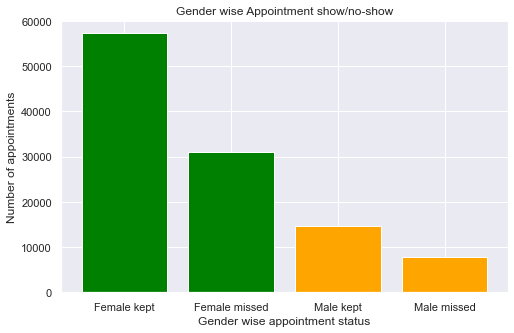

In [319]:
#plotting the bar chart for Gender wise Appointment show/no-show
plt.figure(figsize=(8,5));
plt.bar(['Female kept','Female missed','Male kept','Male missed'],gender_data.values,color=['green','green','orange','orange']);#plotting number of appointments missed vs attended by both sex.
plt.title('Gender wise Appointment show/no-show');
plt.xlabel('Gender wise appointment status');
plt.ylabel('Number of appointments');

It can be seen that more females show up for appointments than males. Also, more females tend to miss their appointments than males.
To ensure the above result is not simply due to the fact that there are much more females who scheduled an appointment,we will make a plot with the proportions instead.

In [320]:
# calculating proportions for show/no show with gender
gender_count = df.groupby('gender').count().iloc[:, 0]
proportions = gender_data/gender_count
proportions = proportions.reset_index().rename({0:'proportions'}, axis=1)
proportions

,no_show,gender,proportions
0,No,F,0.796879
1,No,M,0.800321
2,Yes,F,0.203121
3,Yes,M,0.199679


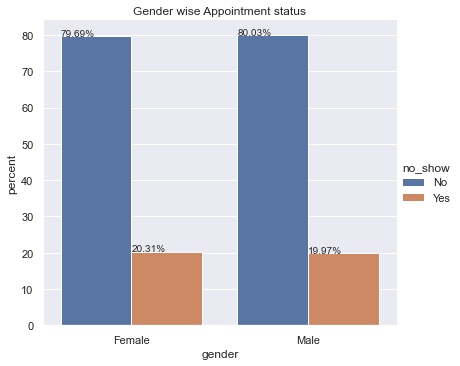

In [321]:
#plotting percent bar chart for Gender wise Appointment Status by using the function defined earlier
draw_percent_plot('gender',"Gender wise Appointment status",['Female', 'Male'])

There are 57243 females and 30962 males who showed and 14591 females and 7725 males who did not show up for their appointments. Hence, of the patients who showed up for their appointments, the majority were females. We also observe that the proportion of males and females who showed and didn't show for their appointments is very similar. Approximately 80% of both genders showed for their appointments, while about 20% of both genders didn't show up for their medical appointments.
So, as the proportions are identical, we can say that gender doesnot influence the likelihood of a patient showing up/missing an appointment.

### Research Question 3  Are the digital /social media reminders are helping the patients to attend doctor's appointment?

Now, intuitively there are more chances of patients who receive SMS reminders to show up for the appointment than the ones who do not. Let us check what this dataset has to say by first counting the sms recieved for each appointment.

In [322]:
#counting no of patients who received sms
df.sms_received.value_counts()


0    75040
1    35481
Name: sms_received, dtype: int64

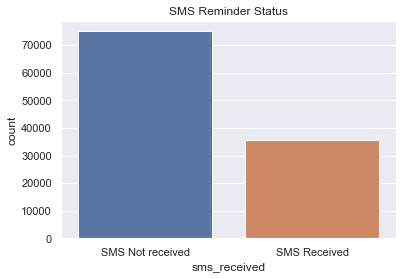

In [323]:
#plotting bar charts for SMS Reminder Status
ax = sns.countplot(x=df.sms_received, data=df)
ax.set_title("SMS Reminder Status")
x_ticks_labels=['SMS Not received', 'SMS Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

75,040 out of the total patients (according to the appointments) did not receive any sms reminder and only 35,481 reecived a formal reminder. Let us check in terms of percentages now for understanding better.

In [324]:
#calculating percentage of patients with SMS Reminder Status received/not
df.groupby('sms_received').sms_received.count()*100/df.sms_received.count()

sms_received
0    67.896599
1    32.103401
Name: sms_received, dtype: float64

As seen above, 68% of the patients didnot receive any reminder and only 32% did. It is interesting to note that that there are so many patients who did not receive an sms. 
Now, let us check if this indeed affects the likelihood of showing up for the appointment.

In [325]:
#counting no of patients who showed up / not for appointments by grouping them with sms received
sms_data=df.groupby('no_show')['sms_received'].value_counts()
sms_data

no_show  sms_received
No       0               62508
         1               25697
Yes      0               12532
         1                9784
Name: sms_received, dtype: int64

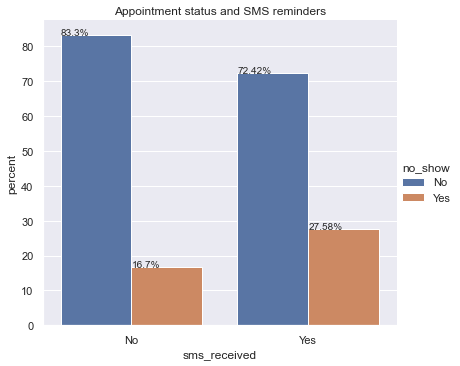

In [326]:
#plotting percent bar chart for Appointment Status with SMS reminders by using the function defined earlier
draw_percent_plot('sms_received',"Appointment status and SMS reminders",['No', 'Yes'])

It is interesting here to note that among the patients who did not receive SMS reminder, around 17% did not show up for the appointment. On the contrary, among the patients who did receive SMS, around 27% did not show up for the appointment. This means that having received an SMS may slightly decrease the chances of a patient not showing up for an appointment, but this likelihood doesn't appear to be substantive and needs more details. So, we cannot say that receiving an SMS has any influence on the likelihood of showing up/not for an appointment. 

### Research Question 4 Is Scholarship from the government helping patients for good turnaround for physician visits?

Let's start by looking at the number of patients who were enrolled in the Brasilian Bolsa Família welfare program. Intuitively, those patients who received this scholarship should be showing up more for their appointments. Let us analyze what our dataset has to say.


In [327]:
#counting no of patients who received scholarship
df.scholarship.value_counts()


0    99660
1    10861
Name: scholarship, dtype: int64

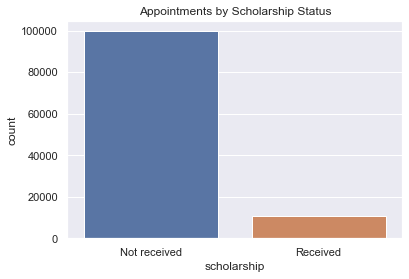

In [328]:
#plotting bar chart for no of patients who received/not scholarship
ax = sns.countplot(x=df.scholarship, data=df)
ax.set_title("Appointments by Scholarship Status")
x_ticks_labels=['Not received', 'Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Among the total patients, only 10861 received a scholarship and 99666 did not receive a scholarship. Let us check in terms of percentages to understand better.

In [329]:
#calculating percentage of patients who received/not scholarship
df.groupby('scholarship').scholarship.count()*100/df.scholarship.count()

scholarship
0    90.172908
1     9.827092
Name: scholarship, dtype: float64

So, it can be observed that only around 10% out of the total pateints received a scholarship. 
<br>Now let us check if this has any impact on the appointment status as well.

In [277]:
#counting no of patients who showed up/not by grouping them with/without scholarship
df.groupby('no_show')['scholarship'].value_counts()

no_show  scholarship
No       0              79922
         1               8283
Yes      0              19738
         1               2578
Name: scholarship, dtype: int64

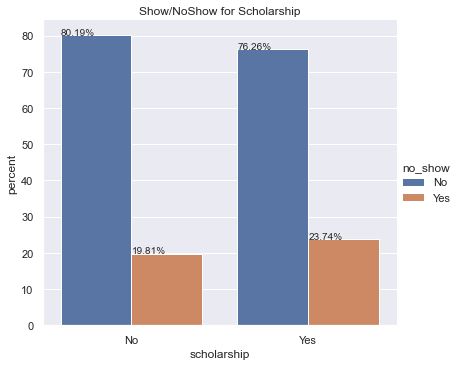

In [278]:
#plotting percent bar chart for Appointment Status for Scholarship by using the function defined earlier
draw_percent_plot('scholarship',"Show/NoShow for Scholarship",['No', 'Yes'])

So here we can observe that among the patients who received scholarship, the likelihood of showing up is less than those of those who didn't get a scholarship. We had expected that patients who have reecived scholarship would have been all attended the physician but it seems that around 24% of these patients did not show up which is again interesting to note.

<a id='conclusions'></a>
## Limitations
 >The data consists of only April, May and June months. If we had complete year data on monthly basis,the analysis could have been more accurate and we could identify the traffic months for doctors appointments.

>The age variable has been categorized further given it's wide range. This could perhaps have caused to override certain nuanced details if analysis was based on individual age values instead of bins.

>If we had more data about the SMS reminders sent to the patients like how many reminders were sent and when were they sent, we could have come up with some more accurate analysis.

>This analysis also lies strictly within the confines of Descriptive Statistical Analysis  as we did not perform any of the Inferential Statistical Analysis.

<a id='conclusions'></a>
## Conclusions

> The No-show rate of medical appointments is highly dependent on the age of the patients. As we observed, as the age increases, the likelihood of missing any appointments decreases. The senior and older patients (age 38 and above) are the ones who are active in showing up for the appointments.
<br>Next analysis was done with respect to gender. And it was observed that both males and females missed around 20% of the appointments. Therefore, there seemed to be no significant difference between males and females with respect to showing up for appointments. 
<br>Majority of the visits or appointments happened on the weeekdays (Tuesdays and Wednesdays) when compared to weekends.Infact Saturday had mere 39 scheduled appointments. Hence weekdays are more preferred by patients for booking appointment.
<br>We may infer that sending SMS reminders does not significantly influence the status of the appointment. For the patients who showed up for their appointments, the number of patients that did not receive an sms is by far higher than those who did receive an sms, hence, receiving an sms does not increase the chances of showing for an appointment.
<br>Also, it is interesting to note that among the patients who received scholarship, the likelihood of showing up is less than those of those who didn't get a scholarship.

<a id='conclusions'></a>
## References
>https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
<br>https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html
<br>https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
<br>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
<br>https://realpython.com/pandas-groupby/